In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = '/Users/forheart/Downloads/yelp_dataset/yelp_academic_dataset_review.json'

In [3]:
max_records = 1e5
df = pd.read_json(file, lines=True, chunksize=max_records)
data = pd.DataFrame()
try:
   for df_chunk in df:
       data = pd.concat([data, df_chunk])
except ValueError:
       print ('\nSome messages in the file cannot be parsed')

In [4]:
data.shape

(5996996, 9)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [8]:
# Create a pandas series containing the number of reviews for all businesses.
bybusiness = data['business_id'].value_counts()

In [9]:
df_business = pd.DataFrame({'business_id':bybusiness.index, 'review_counts':bybusiness.values})

In [10]:
df_business.shape

(188593, 2)

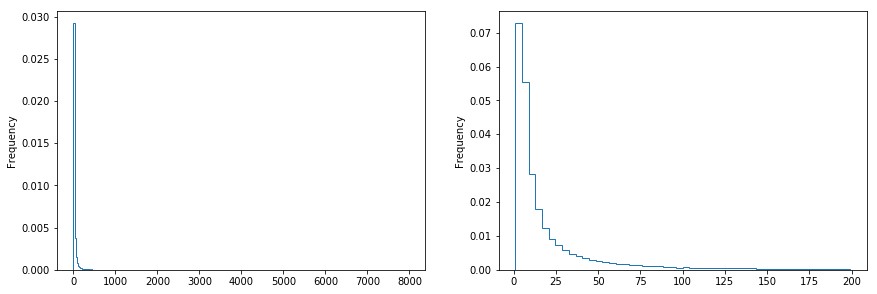

In [13]:
plt.subplot(1, 2, 1)
df_business['review_counts'].plot(kind='hist', bins=300, histtype='step', density=True)
plt.subplot(1, 2, 2)
df_business['review_counts'][df_business['review_counts'] < 200].plot(kind='hist', bins=50, histtype='step', density=True)
plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=1, wspace=None)

The above two graphs show that the distribution of the review counts of businesses is skewed to the right side, meaning most businesses have small review counts, only a small portion of the businesses have a lot of reviews.

In [18]:
print(np.percentile(df_business['review_counts'], [0, 95]))
print(np.percentile(df_business['review_counts'], [0, 75]))

[  1. 123.]
[ 1. 24.]


### The histograms of the review counts and percentile analysis show that 95% of business have less than 123 reviews, and 75% of the businesses have less than 24 reviews. In order to avoid those businesses that have very little reviews, I will randomly sample 1000 busineses from the top 5% businesses with most reviews. 

In [24]:
# the 5% businesses (9430 businesses) with most reviews. These busineses have more than 123 reviews.
business_sample = df_business.iloc[:9430]

# Ramdomly sample 1000 businesses.
business_sub = business_sample.sample(1000, random_state=1)

In [25]:
business_sub['review_counts'].sum()

308429

In [27]:
business_sub.head()

,business_id,review_counts
7555,fpADWrjAQwJJrBMBdBCvJg,146
3005,eOl6WS3oAjtGZpcXfv8tlA,282
5636,mnU3iGsL55MCWXiWV3AcAQ,183
8800,2gI7dlktBQXPZiuOW-HWvw,129
3832,JogUSDKa1xyG3lLEmD4Xjg,242


In [28]:
review = pd.merge(business_sub, data, on='business_id', how='left')

In [29]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308429 entries, 0 to 308428
Data columns (total 10 columns):
business_id      308429 non-null object
review_counts    308429 non-null int64
cool             308429 non-null int64
date             308429 non-null datetime64[ns]
funny            308429 non-null int64
review_id        308429 non-null object
stars            308429 non-null int64
text             308429 non-null object
useful           308429 non-null int64
user_id          308429 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 25.9+ MB


In [39]:
# The predcition of the ratings will only use the text column, so some other columns will not be used.
review = review.drop(columns=['review_counts', 'cool', 'funny', 'useful'])

In [40]:
review.head()

,business_id,date,review_id,stars,text,user_id
0,fpADWrjAQwJJrBMBdBCvJg,2016-12-19,OEmutkjxr6ievjXvrgFGMA,1,"WOWOWOowow, jeeeeeeeeeeeeze. There is so much ...",0WcHiM_jT1jN-wxk790qBg
1,fpADWrjAQwJJrBMBdBCvJg,2017-05-23,qOqpwCwGtZH9RJc2gs4Dew,1,This location has the worst drive through I've...,Vo_68hV91XR04bZ993MKCg
2,fpADWrjAQwJJrBMBdBCvJg,2015-04-26,FWUnbMw4TvgdrBZD8G0JNw,1,"First time I tried Tropical smoothie, not impr...",0rHzL5Qy-IFrwSmRKehx2Q
3,fpADWrjAQwJJrBMBdBCvJg,2017-08-30,miJm99wYp5Z0SOzCwXtzVw,1,If you enjoy spending 10 mins in drive thru be...,SwzCXae8zEi77FA3hjYd1w
4,fpADWrjAQwJJrBMBdBCvJg,2014-06-14,nHTCFqKMq85UQKqGFMVA2Q,5,I gave it 5 stars just because I didn't have a...,hktqVwzT-qIordt-MAfa-Q


In [53]:
# Save the subset dataframe to a csv file due to the long time needed to load the full dataframe.
review.to_csv('review_sample')

In [2]:
# This will be the first line of code to restart the kernel
review = pd.read_csv('review_sample')

In [3]:
# Previous analysis indicated that even the sample size of 308429 is too slow to run the machine 
# learning algorithms, here an even smaller sample size was taken to make it faster.

review = review.sample(30000, random_state=1)

review = review.drop(columns=['Unnamed: 0'])

In [4]:
review.head()

,business_id,date,review_id,stars,text,user_id
102461,hL5tldgv2eLcL-AUnPZ9gA,2017-08-03,G5Hex0EKC_yPjj1VKozvkA,4,"After going through 10 plumbers, Pure Plumbing...",8W4969tAJqsmzQVeCRnRZQ
186239,wsa4S6L7WPRgL17KP4JxYg,2017-02-16,V7Op-5roBJjbaagsLpcCoQ,3,This is one of those times I wish there was a ...,LXJ9QLI8V4zDC_kBhKOKhw
304047,KU7eFCdA47v6zeKF3a7j6A,2014-01-26,iG6oVFCJOhw0A1hFdyOIEg,3,I have eaten here many times. I like that they...,S6XOGg1gJ-5iNWj0Au-zgw
224014,oo-kGk1BEWpuDvSE4gfmgQ,2017-09-06,dmYJfNt8xmoQUjnPv4BGcw,4,Another hit for Fox Restaurants. A great mix o...,r64WY53LOMRPowHDu2JIXw
1609,gYAM9MZ_s-YKIUZSZ2Evyg,2014-07-25,0dgKI1OjOarPP0sKzOiIsg,4,I ordered a blonde beer and a 12 oz N.Y. strip...,vt02GdkuHPBnJNQmtZr3OQ


## Exploratory Data Analysis

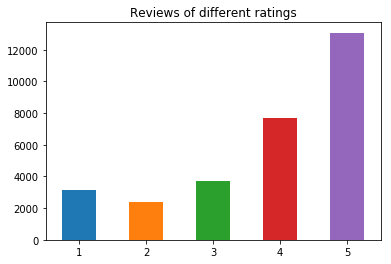

In [5]:
rating = review['stars'].value_counts(sort=False)
rating.plot(kind='bar', title = 'Reviews of different ratings', rot=0)

The 5 star reviews have the most counts, followed by 4, 3, 1 and 2.

In [6]:
print('There are {} unique users that wrote {} reviews.'.format(review.user_id.nunique(), review.shape[0]))

There are 27403 unique users that wrote 30000 reviews.


In [7]:
import seaborn as sns

In [8]:
# Create another column called text_length to count the word counts of each review.
review['text_length'] = review['text'].apply(lambda x:len(x.split()))

stars
1    145.021485
2    150.284176
3    139.252643
4    119.351260
5     91.526968
Name: text_length, dtype: float64

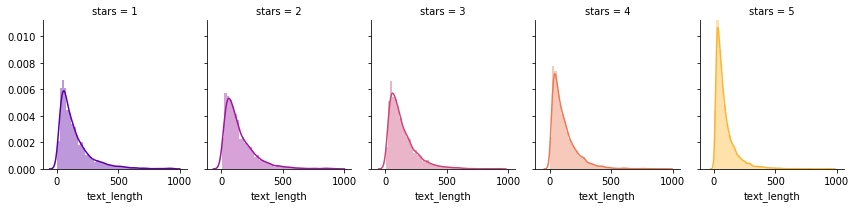

In [9]:
a = sns.FacetGrid(data = review, col = 'stars', hue = 'stars', palette='plasma', aspect=0.8)
a.map(sns.distplot, "text_length")
review.groupby('stars').mean()['text_length']

### The above analysis shows that people who tend to review a business as good (4 or 5 stars) have shorter reviews (91 or 119 words), and the reviews that have poor ratings (1 or 2) tend to be longer (145 to 150) words.

In [10]:
# The one-way ANOVA tests the null hypothesis that the distribution of the text lengths of 
# all stars have the same mean length.

from scipy import stats

In [11]:
stats.f_oneway(review.stars[review['stars']==1], review.stars[review['stars']==2], 
               review.stars[review['stars']==3], review.stars[review['stars']==4],
              review.stars[review['stars']==4])

F_onewayResult(statistic=1.6126728870636333e+19, pvalue=0.0)

The null hypothesis should be rejected because the pvalue is 0, meaning the mean text lengths for different stars are significantly different.

In [26]:
# Remove the punctuations and stopwords from the text
import nltk
from nltk.corpus import stopwords
import string
from wordcloud.wordcloud import WordCloud, STOPWORDS

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/forheart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def cleaning(text):
    nopunc = [i for i in text if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostopwords = [words for words in nn if words not in stopwords.words('english')]
    return(nostopwords)

In [15]:
# Test the function cleaning that was just created
text='i want to have noodles! ha~'
cleaning(text)

['want', 'noodles', 'ha']

In [16]:
star_5 = cleaning(review['text'][review.stars==5].values)

In [17]:
from PIL import Image

In [18]:
star_5_bow = ' '.join(star_5)

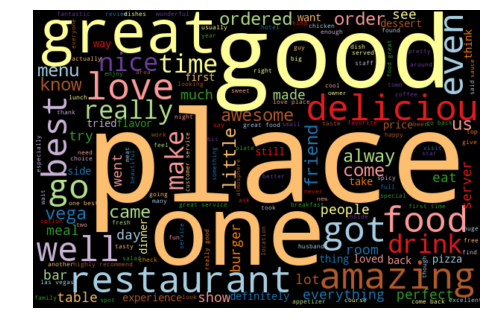

In [20]:
# Create a word cloud for the 5 starred reviews
stopwords = set(STOPWORDS)
wordcloud_5 = WordCloud(colormap = "Paired", width = 300, height = 200, scale=2, max_words=1000, 
                           stopwords=stopwords).generate(star_5_bow)
plt.figure(figsize = (8,12))
plt.imshow(wordcloud_5, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_5.to_file("star_5.png")

In [23]:
star_4 = cleaning(review['text'][review.stars==4].values)
star_4_bow = ' '.join(star_4)

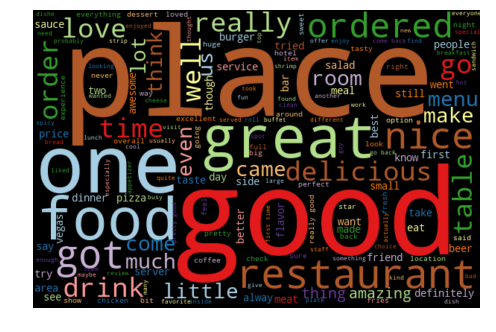

In [24]:
# # Create a word cloud for the 4 starred reviews
stopwords = set(STOPWORDS)
wordcloud_4 = WordCloud(colormap = "Paired", width = 300, height = 200, scale=2, max_words=1000, 
                           stopwords=stopwords).generate(star_4_bow)
plt.figure(figsize = (8,12))
plt.imshow(wordcloud_4, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_4.to_file("star_4.png")

In [27]:
star_1 = cleaning(review['text'][review.stars==1].values)

In [28]:
star_1_bow = ' '.join(star_1)

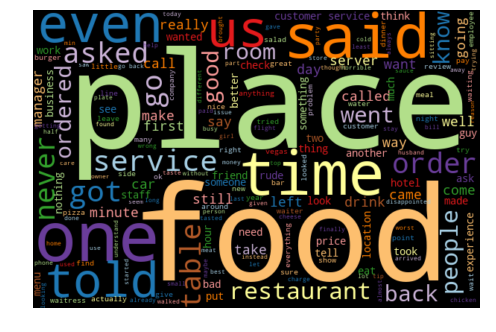

In [29]:
# # Create a word cloud for the 1 starred reviews
stopwords = set(STOPWORDS)
wordcloud_1 = WordCloud(colormap = "Paired", width = 300, height = 200, scale=2, max_words=1000, 
                        stopwords=stopwords).generate(star_1_bow)
plt.figure(figsize = (8,12))
plt.imshow(wordcloud_1, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_1.to_file("star_1.png")

#### The 5 star reviews use positive words like good, great, love, delicous, amazing. The 4 star reviews have similar words as 5 stars, but not as many "love", "amazing", "best" as in 5 star reviews. The most frequent word for all reviews would be a neutral word "place". The most request words in 1 star reviews are neutral words such as place, food, time, said, total, table, order, service, never.

## Prediction of the ratings

### Multinomial Naive Bayes Classifier

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [31]:
def cleaning_text(text):
    nopunc = [i for i in text if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostopwords = [words for words in nn if words not in stopwords.words('english')]
    cleantext = ' '.join(nostopwords)
    return(cleantext)

In [32]:
# Use the cleaned text as the feature variables
from nltk.corpus import stopwords
review['clean_text'] = review['text'].apply(cleaning_text)

In [33]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [34]:
# Multinomial Naive Bayes without cross validation
nb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
y_pred = nb.predict(X_test)

In [36]:
y_pred[:10]

array([5, 1, 5, 5, 4, 1, 4, 5, 4, 5])

In [37]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.7497083333333333
The accuracy score for the test set is 0.5893333333333334


#### In multi-label classification, classifier.score is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted. So an accuracy score of 0.59 is not too bad.

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 435,   52,   65,   51,   30],
       [ 127,   45,  147,  126,   38],
       [  56,   22,  156,  380,  124],
       [  42,    5,   31,  772,  682],
       [  65,    5,   15,  401, 2128]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.69      0.64       633
           2       0.35      0.09      0.15       483
           3       0.38      0.21      0.27       738
           4       0.45      0.50      0.47      1532
           5       0.71      0.81      0.76      2614

   micro avg       0.59      0.59      0.59      6000
   macro avg       0.50      0.46      0.46      6000
weighted avg       0.56      0.59      0.56      6000



#### All metrics, precision, recall and f1-score are highest for 5 star reviews, followed by 1 star reviews. It shows that the naive bayes model works better for the extremely good or bad ratings. The recalls for class 2 and 3 are very low, because neutral customer experiences might not have distinct features to be labeled as neutral.

#### Picking Hyperparameters for Naive Bayes

In [40]:
# Use an elbow approach to decide the min_df
X1 = X >= 1
# Take the sum of each document count along the columns of X to get the total document count that word
# appears in all reviews.
xi = np.sum(X1, axis = 0)

In [41]:
print('The maximum number of a word in all documents is ', np.amax(xi))
print('The minimum number of a word in all documents is ', np.amin(xi))

The maximum number of a word in all documents is  12164
The minimum number of a word in all documents is  1


In [42]:
xx = np.linspace(1,12164, num=12164)
n = xi.shape[1]
yy = np.empty(12164)
for i in range(12164):
    yy[i] = (np.sum(xi < xx[i]))/n*100

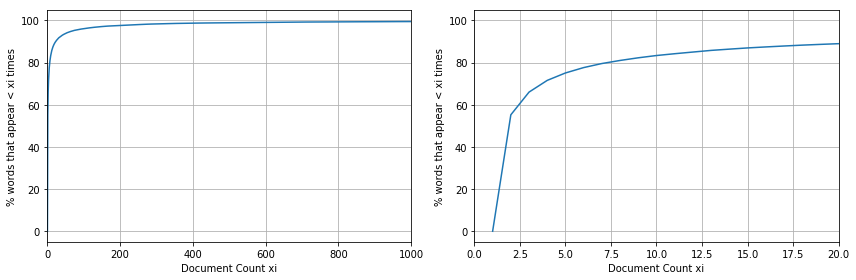

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(xx, yy)
ax1.set_xlim([0, 1000])
ax1.set_xlabel('Document Count xi')
ax1.set_ylabel('% words that appear < xi times')
ax1.grid(True)

ax2.plot(xx, yy)
ax2.set_xlim([0, 20])
ax2.set_xlabel('Document Count xi')
ax2.set_ylabel('% words that appear < xi times')
ax2.grid(True)

fig.tight_layout()
plt.show()

#### The curve's slope is steepest when xi < 2. We can pick df_min = 2.

In [44]:
vectorizer = CountVectorizer(min_df=2)
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [46]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.7412083333333334
The accuracy score for the test set is 0.5953333333333334


#### The accuracy score for the test set after using min_df is slightly better than without min_df.

In [49]:
from sklearn import metrics

In [50]:
# Create the list of alphas: alphas
# After several trials, the range below was chosen to pick the best alpha
alphas = np.arange(1, 2, 0.2)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(X_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(X_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  1.0
Score:  0.5953333333333334

Alpha:  1.2
Score:  0.5971666666666666

Alpha:  1.4
Score:  0.5966666666666667

Alpha:  1.5999999999999999
Score:  0.597

Alpha:  1.7999999999999998
Score:  0.5966666666666667



#### The best hyperparameter alpha for the Multinomial Naive Bayes is 1.2.

In [51]:
# Use the best alpha and min_df
nb = MultinomialNB(alpha=1.2)
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.2, class_prior=None, fit_prior=True)

In [52]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.73475
The accuracy score for the test set is 0.5971666666666666


#### Use tfidfvectorizer instead of countvectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=2, stop_words='english')
X_tfidf = tfidfvectorizer.fit_transform(review.clean_text)
y_tfidf = review.stars.values

In [54]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=1, stratify=y)
clf_tfidf = MultinomialNB().fit(Xt_train, yt_train)

In [55]:
print('The accuracy score for the train set is', clf_tfidf.score(Xt_train, yt_train))
print('The accuracy score for the test set is', clf_tfidf.score(Xt_test, yt_test))

The accuracy score for the train set is 0.5303333333333333
The accuracy score for the test set is 0.4865


#### Try n-gram range in sklearn for CountVectorizer()

In [56]:
# Try 2-gram
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
vectorizer = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2), min_df=2)

In [57]:
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [58]:
clf = MultinomialNB()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [60]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))

The accuracy score for the train set is 0.92075
The accuracy score for the test set is 0.6


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
alpha_space = np.linspace(0.1, 1, 10)
param_grid = {'alpha': alpha_space}
clf = GridSearchCV(MultinomialNB(), param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
y_pred = clf.predict(X_test)
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))
print('The best hyperparameter is ', clf.best_params_)

The accuracy score for the train set is 0.9489166666666666
The accuracy score for the test set is 0.5995
The best hyperparameter is  {'alpha': 0.6}


In [66]:
# Try bigram and trigram
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
vectorizer = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,3), min_df=2)

In [67]:
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [68]:
clf = MultinomialNB()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [70]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))

The accuracy score for the train set is 0.9360833333333334
The accuracy score for the test set is 0.6016666666666667


In [72]:
alpha_space = np.linspace(0.1, 1, 10)
param_grid = {'alpha': alpha_space}
clf = GridSearchCV(MultinomialNB(), param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
y_pred = clf.predict(X_test)
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))
print('The best hyperparameter is ', clf.best_params_)

The accuracy score for the train set is 0.9559166666666666
The accuracy score for the test set is 0.6041666666666666
The best hyperparameter is  {'alpha': 0.7000000000000001}


### Random Forest Classification

In [219]:
# Try to use a random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [227]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [228]:
print('The accuracy score for the train set is', rf.score(X_train, y_train))
print('The accuracy score for the test set is', rf.score(X_test, y_test))

The accuracy score for the train set is 0.9999583333333333
The accuracy score for the test set is 0.5393333333333333


The accuracy score for the test set apparently shows over-fitting.

### Fine tuning of hyperparameters of Random Forest Regression

In [252]:
from sklearn.model_selection import GridSearchCV

In [259]:
# Set threshold for early stopping in tree growth
rf = RandomForestClassifier()

param_grid={'n_estimators':[10, 50], 
            'max_features':[1.0, 0.5],
            } 
estimator = GridSearchCV(rf, param_grid, cv=5)

In [ ]:
estimator.fit(X_train, y_train)

In [246]:
y_pred = estimator.predict(X_test)

In [247]:
print('The accuracy score for the train set is', estimator.score(X_train, y_train))
print('The accuracy score for the test set is', estimator.score(X_test, y_test))

The accuracy score for the train set is 0.48541666666666666
The accuracy score for the test set is 0.4711666666666667


In [74]:
from sklearn.feature_selection import RFE

# create a gradient boosting regressor
model = MultinomialNB()
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)

KeyboardInterrupt: 

### What are the strongly predictive features?

In [2]:
words = np.array(vectorizer.get_feature_names())

NameError: name 'np' is not defined

In [1]:
x = np.eye(X_test.shape[1]) #Return a 2-D array with ones on the diagonal and zeros elsewhere.

x.shape

prob = nb.predict_log_proba(x)

2

In [69]:
words.shape

(41516,)

In [31]:
probs = prob[:, 0]

In [32]:
ind = np.argsort(probs)  #Returns the indices that would sort an array

In [33]:
# Here we define the good_words to be the words used most in reviews with 5 stars.

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = prob[ind[:10]]
bad_prob = prob[ind[-10:]]

In [ ]:
1+1

In [36]:
good_words

array(['cozy', 'delish', 'perfection', 'museum', 'brew', 'sangria',
       'delicious', 'omelet', 'tart', 'maple'], dtype='<U55')

In [37]:
bad_words

array(['disgusted', 'tft', 'incompetent', 'contract', 'cancel', 'scam',
       'pst', 'outage', 'airline', 'cox'], dtype='<U55')

In [54]:
# Multinomial Naive Bayes with cross validation
nb = MultinomialNB()
cv_scores = cross_val_score(nb, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.58863712 0.6005     0.59333333 0.59283333 0.60386796]
Average 5-Fold CV Score: 0.5958343487223351


In [59]:
from sklearn import metrics

In [63]:
# Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

KeyboardInterrupt: 

In [64]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

KeyboardInterrupt: 